In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [123]:
df = pd.read_csv('spam.csv')

In [124]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3934,ham,You need to get up. Now.,NaN,NaN,NaN
2009,ham,I can't keep going through this. It was never ...,NaN,NaN,NaN
3485,ham,"Yeah, probably earlier than that",NaN,NaN,NaN
2804,ham,I think it's all still in my car,NaN,NaN,NaN
2613,ham,Thanks for sending this mental ability question..,NaN,NaN,NaN


In [125]:
df.shape

(5572, 5)

In [126]:
# 1] Data Cleaning
# 2] EDA - Exploratory Data Analysis
# 3] Text Preprocessing
# 4] Model Building
# 5] Evaluation
# 6] Improvement
# 7] Website

# 1] Data Cleaning

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [128]:
#drop last 3 columns
df.drop(columns= ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [129]:
df.sample(5)

,v1,v2
1181,ham,You flippin your shit yet?
5240,ham,"Gud gud..k, chikku tke care.. sleep well gud nyt"
738,ham,Wish i were with you now!
3750,ham,"Haha... Sounds crazy, dunno can tahan anot..."
4315,ham,"I can't speak, bcaz mobile have problem. I can..."


In [130]:
df.rename(columns = {'v1':'Target','v2':'Text'}, inplace = True)

In [131]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [132]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [133]:
df['Target'] = encoder.fit_transform(df['Target'])

In [134]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [135]:
# missing values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [136]:
# check duplicates values
df.duplicated().sum()

403

In [137]:
# remove duplicate values
df = df.drop_duplicates(keep = 'first')

In [138]:
df.duplicated().sum()

0

In [139]:
df.shape

(5169, 2)

# 2] EDA

In [140]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [141]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

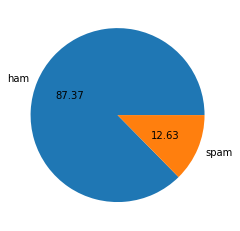

In [142]:
plt.pie(df['Target'].value_counts(),labels = ['ham','spam'],autopct = '%0.2f')
plt.show()

In [143]:
import nltk

In [144]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [145]:
df['Num_characters'] = df['Text'].apply(len)

In [146]:
df

,Target,Text,Num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160
5568,0,Will �_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [147]:
# Num of words
df['Num_words'] = df["Text"].apply(lambda x: len(nltk.word_tokenize(x)))

In [148]:
df

,Target,Text,Num_characters,Num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35
5568,0,Will �_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [149]:
#number of sentences
df['Num_sentences'] = df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [150]:
df.head()

,Target,Text,Num_characters,Num_words,Num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [151]:
df[['Num_characters','Num_words','Num_sentences']].describe()

,Num_characters,Num_words,Num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.456375,1.962275
std,58.174846,13.323322,1.433892
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [152]:
# for ham messages
df[df['Target'] == 0][['Num_characters','Num_words','Num_sentences']].describe()

,Num_characters,Num_words,Num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123339,1.815545
std,56.356802,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [153]:
# for spam messages
df[df['Target'] == 1][['Num_characters','Num_words','Num_sentences']].describe()

,Num_characters,Num_words,Num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.977029
std,30.014336,7.011513,1.493676
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [154]:
import seaborn as sns

<AxesSubplot:xlabel='Num_characters', ylabel='Count'>

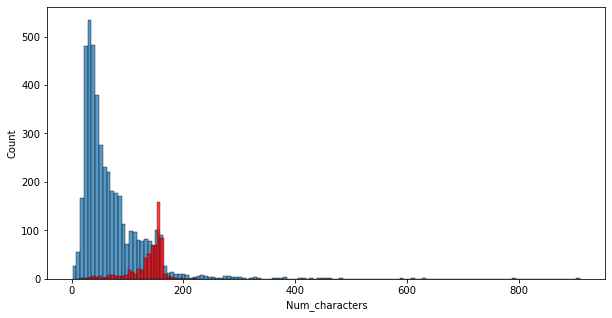

In [155]:
plt.figure(figsize =(10,5))
sns.histplot(df[df['Target'] == 0]['Num_characters'])
sns.histplot(df[df['Target'] == 1]['Num_characters'],color = 'red')

<AxesSubplot:xlabel='Num_words', ylabel='Count'>

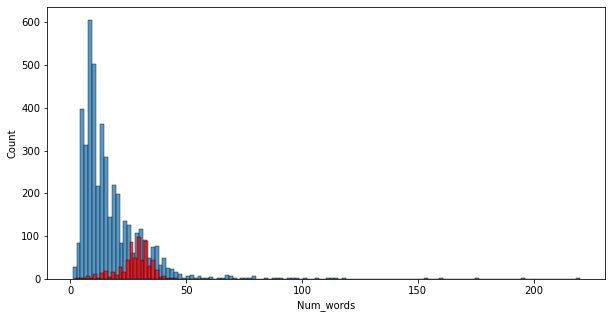

In [156]:
plt.figure(figsize =(10,5))
sns.histplot(df[df['Target'] == 0]['Num_words'])
sns.histplot(df[df['Target'] == 1]['Num_words'],color = 'red')

<AxesSubplot:xlabel='Num_sentences', ylabel='Count'>

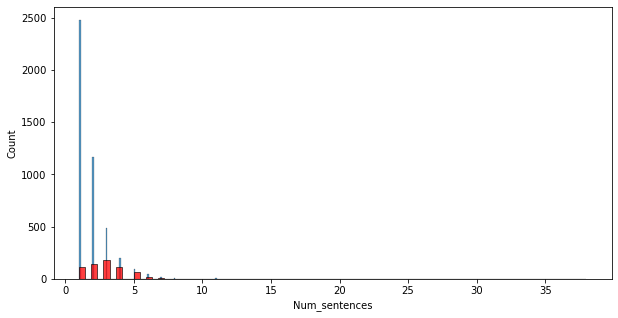

In [157]:
 plt.figure(figsize =(10,5))
sns.histplot(df[df['Target'] == 0]['Num_sentences'])
sns.histplot(df[df['Target'] == 1]['Num_sentences'],color = 'red')

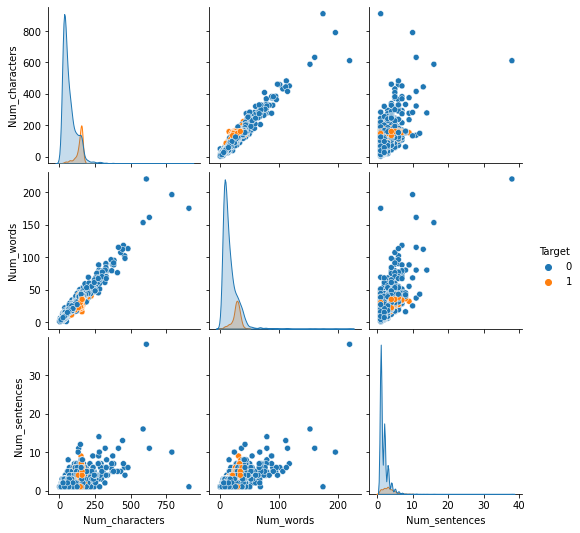

In [158]:
sns.pairplot(df,hue = 'Target')

<AxesSubplot:>

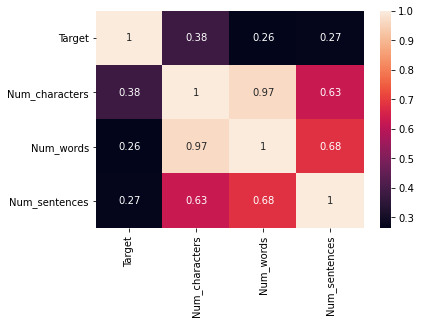

In [159]:
sns.heatmap(df.corr(),annot = True)
# we can use only one column from Num_characters, Num_words, Num_sentences. So all of three are in correlation of each other.
# And Num_characters have good correlation with target. So we use Num_characters

# 3] Data Preprocessing
###### Lower case
###### Tokenization
###### Removing Special Characters
###### Removing stop words adn tokenization
###### Stemming

In [160]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [161]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [162]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Loving')

'love'

In [163]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    x = []
    for i in text:
        if i.isalnum():
            x.append(i)
            
    y = []
    for i in x:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    z = []
    for i in y:
        z.append(ps.stem(i))
    return " ".join(z)

In [164]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [165]:
df['Text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [166]:
df['transformed_text'] = df['Text'].apply(transform_text)

In [167]:
df.head()

,Target,Text,Num_characters,Num_words,Num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [168]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color ='white')

In [169]:
spam_cloud = wc.generate(df[df['Target'] == 1]['transformed_text'].str.cat(sep = " "))

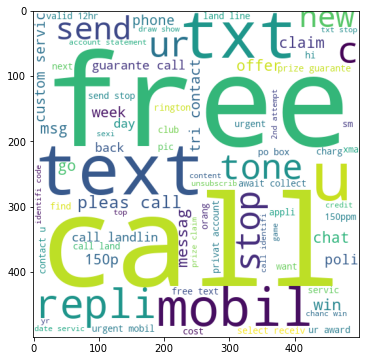

In [170]:
plt.figure(figsize = (15,6))
plt.imshow(spam_cloud)

In [171]:
ham_cloud = wc.generate(df[df['Target'] == 0]['transformed_text'].str.cat(sep = " "))

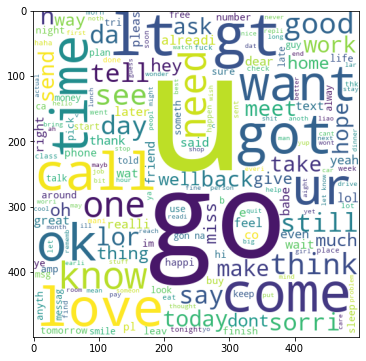

In [172]:
plt.figure(figsize = (15,6))
plt.imshow(ham_cloud)

In [173]:
spam_corpus = []
for msg in df[df['Target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [174]:
len(spam_corpus)

9941

In [175]:
from collections import Counter
spam_most_common_words = pd.DataFrame(Counter(spam_corpus).most_common(30))
spam_most_common_words

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


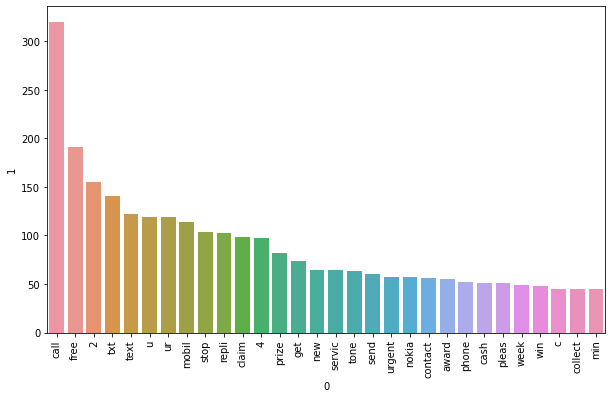

In [176]:
plt.figure(figsize=(10,6))
sns.barplot(spam_most_common_words[0],spam_most_common_words[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [177]:
ham_corpus = []
for msg in df[df['Target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [178]:
len(ham_corpus)

35303

In [179]:
ham_most_common_words = pd.DataFrame(Counter(ham_corpus).most_common(30))
ham_most_common_words

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


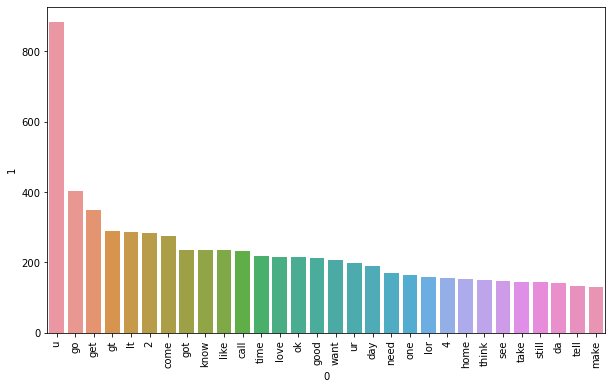

In [180]:
plt.figure(figsize=(10,6))
sns.barplot(ham_most_common_words[0], ham_most_common_words[1])
plt.xticks(rotation = 'vertical')
plt.show()

# 4] Model Buiding

In [181]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [182]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [183]:
X.shape

(5169, 3000)

In [184]:
y = df['Target'].values

In [185]:
y.shape

(5169,)

In [186]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [187]:
from sklearn.model_selection import train_test_split

In [188]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [189]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

In [190]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [191]:
gnb.fit(X_train,y_train)
pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,pred1))
print(confusion_matrix(y_test,pred1))
print(precision_score(y_test,pred1))

0.8704061895551257
[[788 108]
 [ 26 112]]
0.509090909090909


In [192]:
mnb.fit(X_train,y_train)
pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,pred2))
print(confusion_matrix(y_test,pred2))
print(precision_score(y_test,pred2))

0.971953578336557
[[896   0]
 [ 29 109]]
1.0


In [94]:
bnb.fit(X_train,y_train)
pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,pred3))
print(confusion_matrix(y_test,pred3))
print(precision_score(y_test,pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [95]:
# we choose tfidf --> MNB
# try with different algorithms and evaluate models

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [97]:
svc = SVC(kernel = 'sigmoid',gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50,random_state = 2)
bc = BaggingClassifier(n_estimators = 50,random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50,random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50,random_state = 2)
xgb = XGBClassifier(n_estimators = 50,random_state = 2)

In [98]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost': abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'XGB' : xgb
}

In [99]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [100]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9748549323017408, 0.9745762711864406)

In [101]:
names = []
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print('For ',name)
    print('Accuracy - ',current_accuracy)
    print('Precision - ',current_precision)
    
    names.append(name)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.971953578336557
Precision -  1.0
For  DT
Accuracy -  0.9313346228239845
Precision -  0.8252427184466019
For  LR
Accuracy -  0.9564796905222437
Precision -  0.9696969696969697
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  BgC
Accuracy -  0.9593810444874274
Precision -  0.8692307692307693
For  ETC
Accuracy -  0.9796905222437138
Precision -  0.975609756097561
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9278350515463918


C:\Users\dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:07:49] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
For  XGB
Accuracy -  0.9680851063829787
Precision -  0.9338842975206612


In [80]:
performance_df = pd.DataFrame({'Algorithm':names, 'Accuracy':accuracy_scores, 'Precision':precision_scores}).sort_values('Precision',ascending = False)

In [81]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
8,ETC,0.977756,0.991453
5,RF,0.970019,0.990826
0,SVC,0.972921,0.974138
6,AdaBoost,0.962282,0.954128
10,XGB,0.971954,0.950413
4,LR,0.951644,0.940000
9,GBDT,0.951644,0.931373
7,BgC,0.957447,0.861538


In [102]:
temp_df = pd.DataFrame({'Algorithm':names,'Acccuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores})

In [104]:
performance_df.merge(temp_df, on = 'Algorithm')

,Algorithm,Accuracy,Precision,Acccuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.900387,1.000000,0.905222,1.000000
1,NB,0.959381,1.000000,0.971954,1.000000
2,ETC,0.977756,0.991453,0.979691,0.975610
3,RF,0.970019,0.990826,0.975822,0.982906
4,SVC,0.972921,0.974138,0.974855,0.974576
5,AdaBoost,0.962282,0.954128,0.961315,0.945455
6,XGB,0.971954,0.950413,0.968085,0.933884
7,LR,0.951644,0.940000,0.956480,0.969697
8,GBDT,0.951644,0.931373,0.946809,0.927835
9,BgC,0.957447,0.861538,0.959381,0.869231


In [105]:
# voting classifier
mnb = MultinomialNB()
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50,random_state = 2)

from sklearn.ensemble import VotingClassifier

In [106]:
voting = VotingClassifier(estimators = [('mnb', mnb), ('rf', rfc), ('etc', etc)], voting = 'soft')

In [107]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('mnb', MultinomialNB()),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [108]:
y_pred = voting.predict(X_test)
print('Accuracy Score - ', accuracy_score(y_test,y_pred))
print('Precision score - ', precision_score(y_test,y_pred))

Accuracy Score -  0.97678916827853
Precision score -  0.9913793103448276


In [193]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl','wb'))